In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('movies.csv')
df

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,105.902,8.7,17567
1,1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,82.189,8.7,23403
2,2,772071,Cuando Sea Joven,70-year-old Malena gets a second chance at lif...,2022-09-14,37.191,8.7,209
3,3,995133,"The Boy, the Mole, the Fox and the Horse","The unlikely friendship of a boy, a mole, a fo...",2022-12-25,40.516,8.6,251
4,4,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,59.244,8.6,10636
...,...,...,...,...,...,...,...,...
9995,9995,399173,The Assignment,Ace assassin Frank Kitchen is double crossed b...,2016-06-08,18.067,5.5,422
9996,9996,11607,DeepStar Six,The crew of an experimental underwater nuclear...,1989-01-13,10.187,5.5,239
9997,9997,8274,American Pie Presents: Band Camp,"Everyone has 'moved on', except for Sherman an...",2005-10-30,27.730,5.5,1849
9998,9998,19824,Van Wilder: Freshman Year,It is freshman year at Coolidge College and Va...,2009-06-02,15.611,5.5,284


In [4]:
df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,10000.00000,1.000000e+04,10000.000000,10000.00000,10000.000000
mean,4999.50000,1.744521e+05,23.690289,6.72468,1626.228400
std,2886.89568,2.290541e+05,64.278064,0.67403,2790.808813
min,0.00000,2.000000e+00,0.600000,5.50000,199.000000
25%,2499.75000,1.019975e+04,9.780000,6.20000,320.000000
50%,4999.50000,3.327550e+04,13.691500,6.70000,607.000000
75%,7499.25000,3.357772e+05,22.231500,7.20000,1542.250000
max,9999.00000,1.045944e+06,3012.719000,8.70000,33291.000000


In [18]:
df=df.dropna()

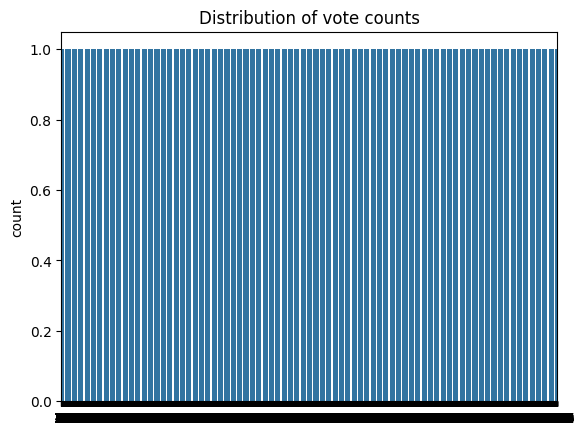

In [19]:
sns.countplot(df['vote_count'])
plt.title('Distribution of vote counts')
plt.show()

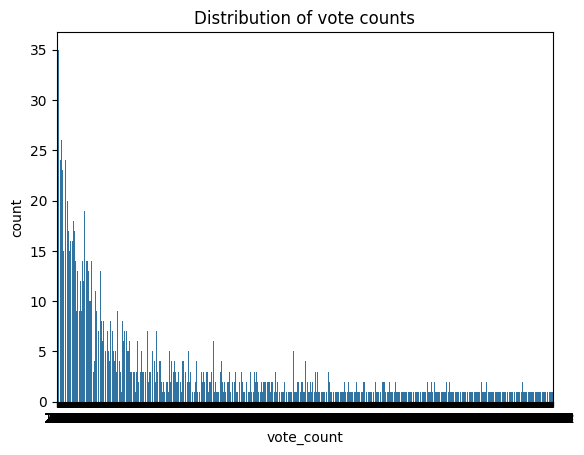

In [20]:
sns.countplot(data=df,x='vote_count')
plt.title('Distribution of vote counts')
plt.show()

<Axes: ylabel='popularity'>

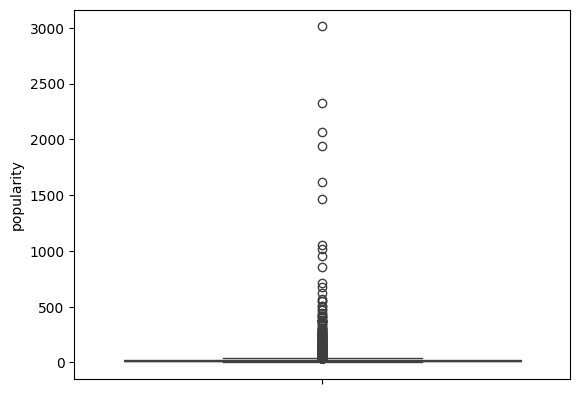

In [21]:
sns.boxplot(df['popularity'])

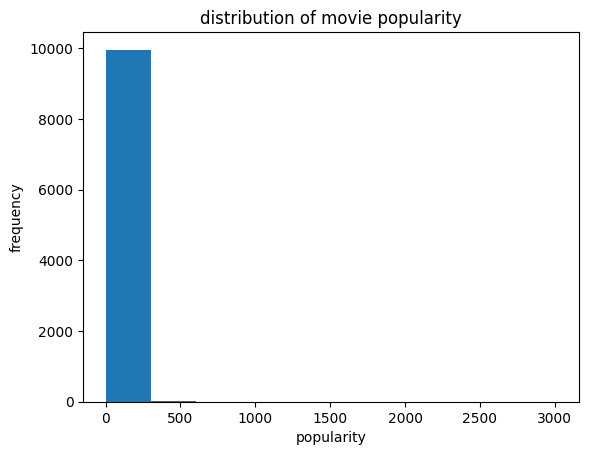

In [22]:
plt.hist(df['popularity'],bins=10)
plt.xlabel('popularity')
plt.ylabel('frequency')
plt.title('distribution of movie popularity')
plt.show()


In [23]:
x=df[['popularity']]
y=df['vote_count']

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [25]:
print(xtrain)
print(xtest)

      popularity
700       13.992
3480      10.894
1621      11.593
800       57.347
6999       5.498
...          ...
9226      15.089
4859       7.625
3264      13.696
9846      13.488
2732      15.944

[7498 rows x 1 columns]
      popularity
5891       9.335
898       41.169
6148      51.133
5325      11.887
7978       9.252
...          ...
9149      10.118
2041      11.868
1108      19.234
7279       8.272
3326      22.695

[2500 rows x 1 columns]


In [26]:
from sklearn.preprocessing import StandardScaler
sc_scale=StandardScaler()
xtrain=sc_scale.fit_transform(xtrain)
xtest=sc_scale.transform(xtest)

In [27]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(xtrain,ytrain)

LogisticRegression()

In [28]:
ypred=classifier.predict(xtest)

In [29]:
correlation_matrix=df.corr()
print('the correlation matrix is:',correlation_matrix)

ValueError: could not convert string to float: 'The Godfather'

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,ytest)
print('confusion matrix is:',cm)

In [ ]:
sns.heatmap(correlation_matrix,annot=True)